# Neural Network from Scratch for Housing Prices Prediction


**Name:** Adila Rahma Widja  
**NIM:** 22/492834/PA/21146 (Even)  
**Class:** Deep Learning 2025   
**Assignment:** Midterm Project - Housing Prices Prediction  

--- 

Implement a neural network from scratch to predict housing prices using the Kaggle dataset. Covers preprocessing, network architecture, flexible gradient descent, activation comparison, and evaluation using MSE.



# Importing Libraries

Import necessary Python libraries for data manipulation, visualization, and dataset splitting. Core functions are implemented in `src/utils.py`.

In [1]:
import sys
sys.path.append("..")

from src.utils import *
from src.nn import NeuralNetwork

Load preprocessed train and test sets (80:20 split). Target values are scaled to [0,1] to facilitate network training.

In [2]:
X_train = pd.read_csv('../results/X_train_scaled.csv')
X_test = pd.read_csv('../results/X_test_scaled.csv')
y_train = pd.read_csv('../results/y_train.csv')
y_test = pd.read_csv('../results/y_test.csv')

# scale target price to 0-1
y_train_scaled = y_train / y_train.max()
y_test_scaled = y_test / y_train.max()

print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)
print('Training labels shape:', y_train.shape)
print('Test labels shape:', y_test.shape)

Training set shape: (436, 12)
Test set shape: (109, 12)
Training labels shape: (436, 1)
Test labels shape: (109, 1)


A quick preview of the data:

In [3]:
display(X_train.head())
display(y_train.head())

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.383727,0.055207,1.537407,2.584674,0.406688,-0.466237,-0.745564,-0.230257,1.499521,0.367534,-0.551986,1.407784
1,0.928115,0.055207,1.537407,-0.911452,0.406688,-0.466237,1.338191,-0.230257,1.499521,2.706878,-0.551986,0.079226
2,-0.607057,-1.282041,-0.557310,-0.911452,0.406688,-0.466237,1.338191,-0.230257,1.499521,1.537206,-0.551986,1.407784
3,-1.154166,0.055207,-0.557310,0.253924,0.406688,-0.466237,1.338191,-0.230257,-0.665350,-0.802137,1.807484,-1.249332
4,-0.636998,0.055207,-0.557310,0.253924,0.406688,-0.466237,-0.745564,-0.230257,-0.665350,-0.802137,-0.551986,-1.249332


,price
0,7525000
1,6300000
2,3920000
3,3430000
4,3010000


# Experiment Setup

Compare neural network performance based on:

- **Hidden layer activations:** ReLU, Tanh, Sigmoid, LeakyReLU
- **Gradient descent types:** Batch, Stochastic, Mini-batch
- **Hyperparameters:** Learning rate, epochs, hidden layer size

Output layer uses **linear activation**; loss is **MSE**.


In [4]:
# experiment setup
learning_rate = 0.001
epochs = 500
log_interval = 100
hidden_neurons = [32, 16]
activation_names = ['relu', 'tanh', 'sigmoid', 'leaky_relu']
gd_types = ['batch', 'stochastic', 'minibatch']

# store results
results_df = pd.DataFrame(columns=[
    'Activation', 'GD_Type', 'Hidden_Size', 
    'Train_MSE', 'Test_MSE', 'Best_Epoch', 'Best_Test_MSE'
])
loss_dict = {}

# Training Loop
Train the network for each combination of activation × gradient descent type.
- **Logging:** Display loss at intervals (log_interval) for monitoring.
- **Loss storage:** Keep track of training loss for visualization.
- **Evaluation:** Compute MSE for train and test sets and store results in a DataFrame.

In [5]:
for act_name in activation_names:
    for gd in gd_types:
        
        # init NN
        nn = NeuralNetwork(
            input_size=X_train.shape[1],
            hidden_sizes=hidden_neurons,
            output_size=1,
            activation_hidden=act_name,
            loss_fn='mse'
        )
        
        print(f"\n\t=== {act_name.capitalize()} - {gd.capitalize()} ===")
        
        # train
        nn.train(
            X_train.values, 
            y_train_scaled.values,
            epochs=epochs,
            lr=learning_rate,
            mode=gd,
            batch_size=32,
            X_test=X_test.values,
            y_test=y_test_scaled.values,
            log_interval=log_interval
        )
        
        train_mse_per_epoch = nn.train_loss_history
        test_mse_per_epoch = nn.test_loss_history
        
        best_test_mse = min(test_mse_per_epoch)
        best_epoch = test_mse_per_epoch.index(best_test_mse) + 1
        
        loss_dict[f'{act_name}-{gd}'] = train_mse_per_epoch
        
        # save results to df
        results_df = pd.concat([results_df, pd.DataFrame([{
            'Activation': act_name,
            'GD_Type': gd,
            'Hidden_Size': '-'.join(map(str, hidden_neurons)),
            'Train_MSE': train_mse_per_epoch[-1],
            'Test_MSE': test_mse_per_epoch[-1],
            'Best_Epoch': best_epoch,
            'Best_Test_MSE': best_test_mse
        }])], ignore_index=True)



	=== Relu - Batch ===
Epoch 1/500 || Train Loss: 0.168196 || Test Loss: 0.200818
Epoch 101/500 || Train Loss: 0.168061 || Test Loss: 0.200674
Epoch 201/500 || Train Loss: 0.167925 || Test Loss: 0.200530
Epoch 301/500 || Train Loss: 0.167790 || Test Loss: 0.200386
Epoch 401/500 || Train Loss: 0.167655 || Test Loss: 0.200242
Epoch 500/500 || Train Loss: 0.167521 || Test Loss: 0.200100

	=== Relu - Stochastic ===
Epoch 1/500 || Train Loss: 0.090615 || Test Loss: 0.068070
Epoch 101/500 || Train Loss: 0.020555 || Test Loss: 0.034286
Epoch 201/500 || Train Loss: 0.020367 || Test Loss: 0.034038
Epoch 301/500 || Train Loss: 0.008049 || Test Loss: 0.015199
Epoch 401/500 || Train Loss: 0.006095 || Test Loss: 0.011386
Epoch 500/500 || Train Loss: 0.005919 || Test Loss: 0.011375

	=== Relu - Minibatch ===
Epoch 1/500 || Train Loss: 0.167875 || Test Loss: 0.200504
Epoch 101/500 || Train Loss: 0.144151 || Test Loss: 0.174292
Epoch 201/500 || Train Loss: 0.123390 || Test Loss: 0.152327
Epoch 301/500

# Experiment Results Summary

In [6]:
results_df = results_df.sort_values('Test_MSE')
display(results_df)

results_df.to_csv('../results/experiment_results.csv', index=False)

,Activation,GD_Type,Hidden_Size,Train_MSE,Test_MSE,Best_Epoch,Best_Test_MSE
10,leaky_relu,stochastic,32-16,0.005937,0.011297,472,0.011289
1,relu,stochastic,32-16,0.005919,0.011375,482,0.011371
4,tanh,stochastic,32-16,0.006564,0.011851,197,0.011712
7,sigmoid,stochastic,32-16,0.020615,0.034352,500,0.034352
8,sigmoid,minibatch,32-16,0.022680,0.037790,500,0.037790
5,tanh,minibatch,32-16,0.080842,0.105409,500,0.105409
11,leaky_relu,minibatch,32-16,0.079455,0.105493,500,0.105493
2,relu,minibatch,32-16,0.080024,0.105528,500,0.105528
6,sigmoid,batch,32-16,0.154337,0.186046,500,0.186046
3,tanh,batch,32-16,0.167488,0.200065,500,0.200065


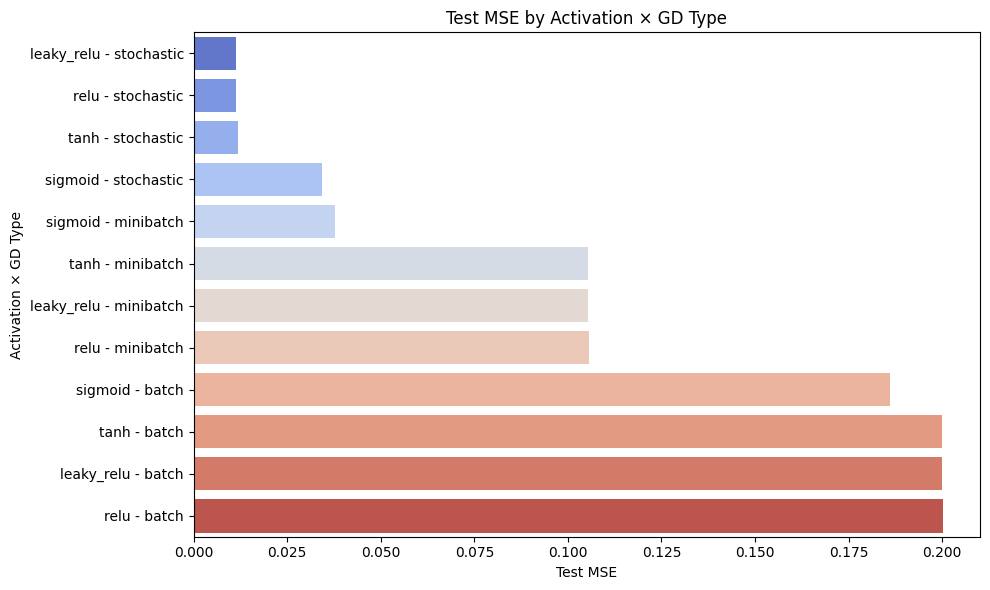

In [7]:
results_df['Act_GD'] = results_df['Activation'] + ' - ' + results_df['GD_Type']

# horizontal barplot
plt.figure(figsize=(10,6))
sns.barplot(
    x='Test_MSE',
    y='Act_GD',
    data=results_df.sort_values('Test_MSE'),  # ascending by Test_MSE
    palette="coolwarm"
)
plt.title("Test MSE by Activation × GD Type")
plt.xlabel("Test MSE")
plt.ylabel("Activation × GD Type")
plt.tight_layout()

# simpan figure
plt.savefig('../results/plots/test_mse_barplot.png', dpi=300, bbox_inches='tight')

plt.show()

Plot training loss curves for the **top 5 best-performing models (lowest Test MSE)**.

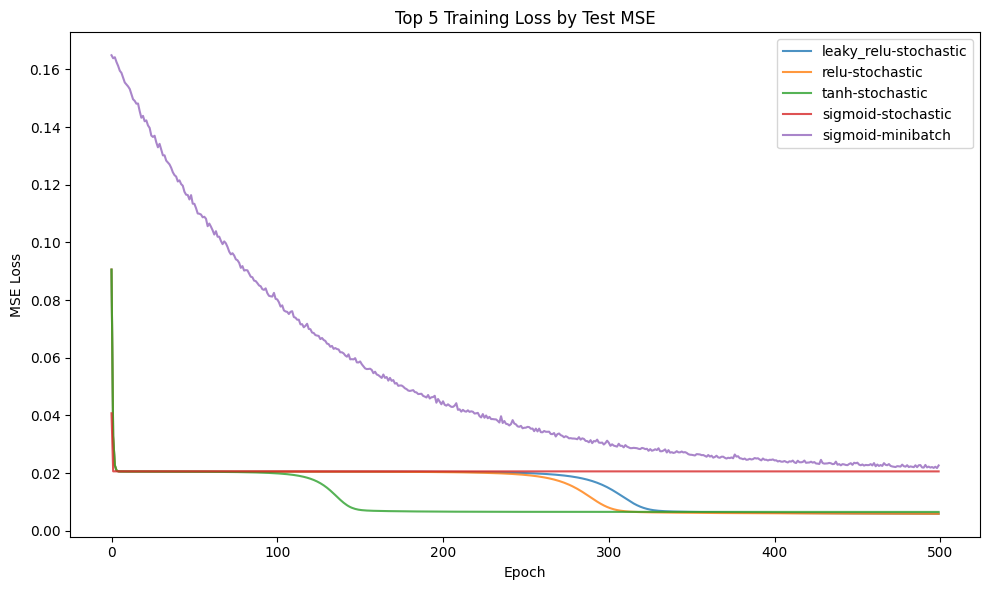

In [8]:
top5 = results_df.nsmallest(5, 'Test_MSE')

plt.figure(figsize=(10,6))
for idx, row in top5.iterrows():
    key = f"{row['Activation']}-{row['GD_Type']}"
    plt.plot(loss_dict[key], label=key, alpha=0.8)

plt.title("Top 5 Training Loss by Test MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.tight_layout()
plt.show()

Generate and save separate plots for each model to observe detailed loss trends across epochs. Figures are stored in `../results/plots/`.

In [9]:
all_losses = np.concatenate(list(loss_dict.values()))
y_min, y_max = all_losses.min(), all_losses.max()

for key, losses in loss_dict.items():
    plt.figure(figsize=(6,4))
    plt.plot(losses, alpha=0.8)
    plt.title(f'Training Loss: {key}')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.ylim(y_min, y_max)
    plt.tight_layout()
    
    filename = f'../results/plots/{key.replace(" ", "_")}_loss.png'
    plt.savefig(filename, dpi=300)
    plt.close()
